In [3]:
import pandas as pd

df = pd.read_csv("clientes_ventas.csv")
df.head()


,Edad,Ingresos_Mensuales,Frecuencia_Compra
0,23,2500,5
1,45,7000,2
2,31,4200,3
3,35,5200,4
4,52,8000,1


In [2]:
from google.colab import files
uploaded = files.upload()

Saving clientes_ventas.csv to clientes_ventas (1).csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar los datos
df = pd.read_csv('clientes_ventas.csv')
df.head()


,Edad,Ingresos_Mensuales,Frecuencia_Compra
0,23,2500,5
1,45,7000,2
2,31,4200,3
3,35,5200,4
4,52,8000,1


Resumen estadístico:
            Edad  Ingresos_Mensuales  Frecuencia_Compra
count  15.000000           15.000000          15.000000
mean   39.666667         5786.666667           2.666667
std    11.298968         2236.983513           1.447494
min    23.000000         2500.000000           1.000000
25%    30.500000         4000.000000           1.500000
50%    38.000000         5800.000000           2.000000
75%    48.000000         7800.000000           4.000000
max    60.000000         9100.000000           5.000000

Valores nulos:
Edad                  0
Ingresos_Mensuales    0
Frecuencia_Compra     0
dtype: int64


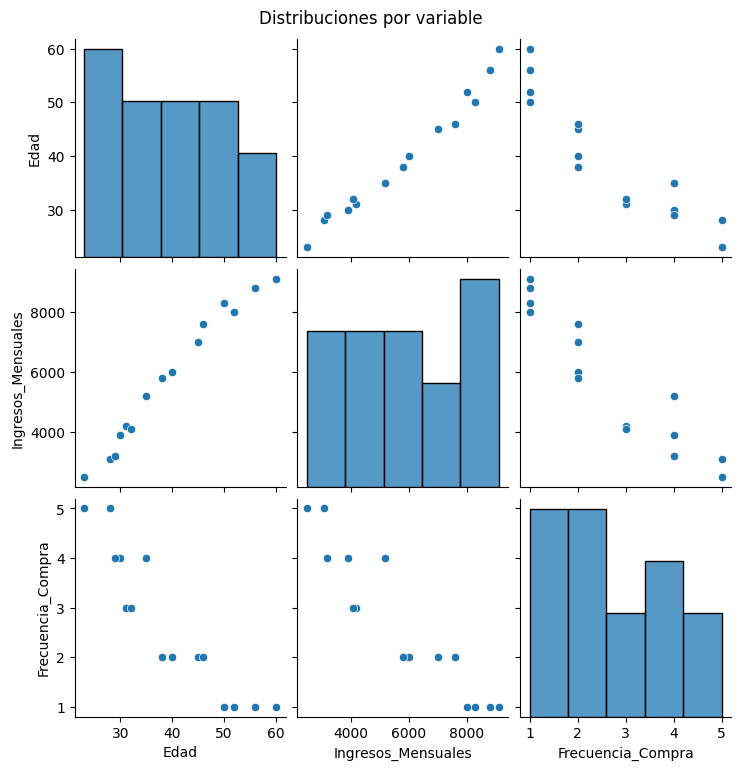

In [5]:
print("Resumen estadístico:")
print(df.describe())

print("\nValores nulos:")
print(df.isnull().sum())

sns.pairplot(df)
plt.suptitle("Distribuciones por variable", y=1.02)
plt.show()


In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convertimos a DataFrame para visualización más clara
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()


,Edad,Ingresos_Mensuales,Frecuencia_Compra
0,-1.526833,-1.520808,1.668560
1,0.488587,0.561434,-0.476731
2,-0.793953,-0.734183,0.238366
3,-0.427513,-0.271463,0.953463
4,1.129857,1.024155,-1.191828


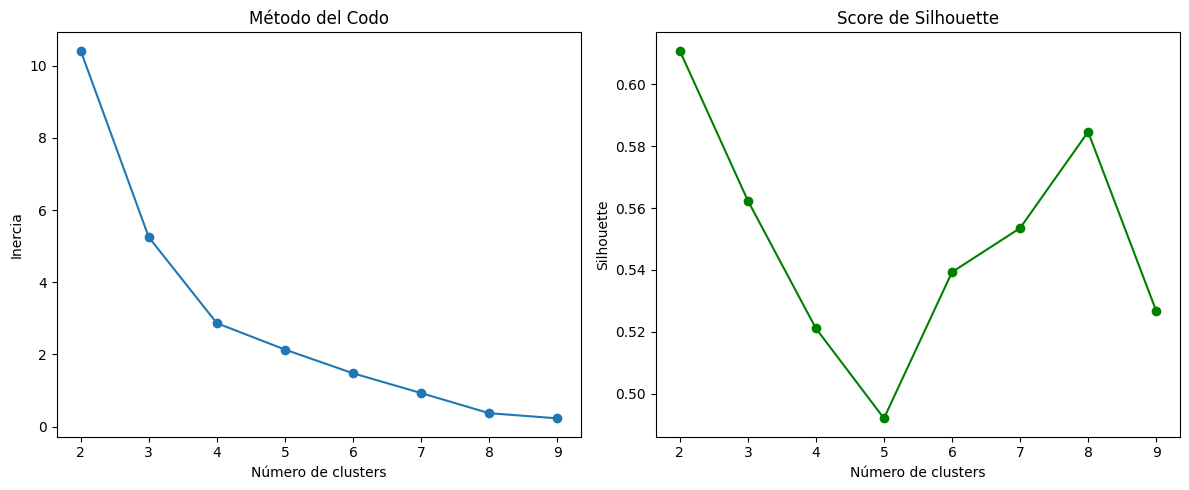

In [7]:
inertia = []
silhouette = []

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(df_scaled)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(df_scaled, model.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette, marker='o', color='green')
plt.title("Score de Silhouette")
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette")

plt.tight_layout()
plt.show()


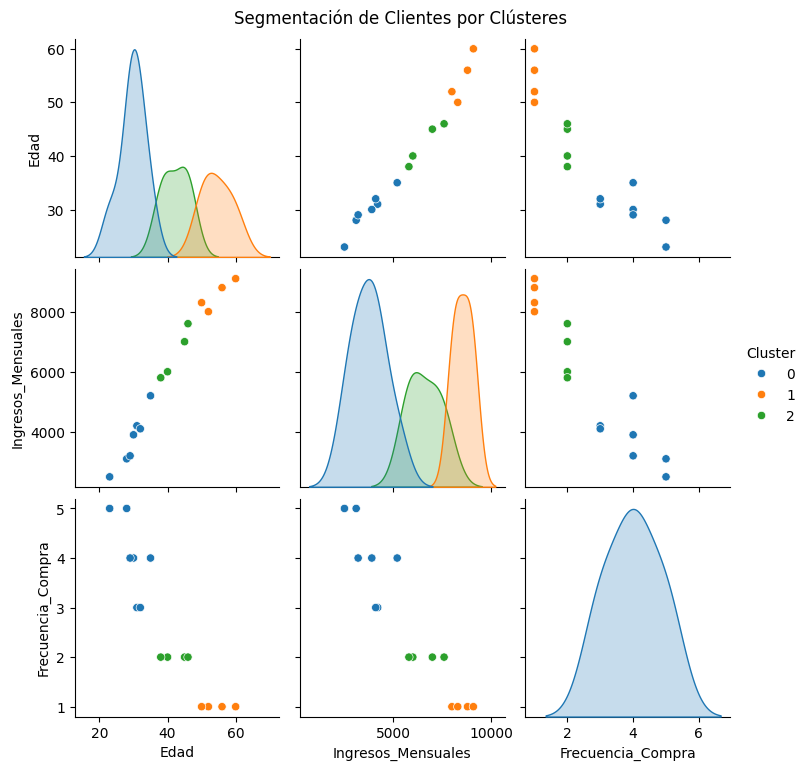

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualización de clústeres
sns.pairplot(df, hue="Cluster", palette="tab10")
plt.suptitle("Segmentación de Clientes por Clústeres", y=1.02)
plt.show()


In [9]:
cluster_summary = df.groupby('Cluster').mean()
print("Resumen por clúster:")
print(cluster_summary)


Resumen por clúster:
              Edad  Ingresos_Mensuales  Frecuencia_Compra
Cluster                                                  
0        29.714286         3742.857143                4.0
1        54.500000         8550.000000                1.0
2        42.250000         6600.000000                2.0
